<a href="https://colab.research.google.com/github/Natalia-git97/Brent-Oil-Times-series/blob/main/Brent_oil_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brent oil - SVR(Linear, RFB e Polynomial), with data ordinaal
Obs: por questões de recursos computacionais só foi possivel executar o RBF


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BrentOilPrices.csv to BrentOilPrices (1).csv


In [ ]:
data = pd.read_csv('/content/BrentOilPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Date_epoch'] = pd.to_datetime(data['Date']).values.astype(np.int64) // 10**6

In [ ]:
#Separando o dataset para treinar de 2006 a 2018 e testar a partir de 2019
X_train = data['Date_epoch'].loc[(data['Date'] >= '2006-01-01') & (data['Date'] < '2018-12-31')].values.reshape(-1,1)
X_test = data['Date_epoch'].loc[(data['Date'] >= '2019-01-01')].values.reshape(-1,1)

y_train = data['Price'].loc[(data['Date'] >= '2006-01-01') & (data['Date'] < '2018-12-31')].values.reshape(-1,1)
y_test = data['Price'].loc[(data['Date'] >= '2019-01-01')].values.reshape(-1,1)


In [ ]:
param_grid = { 'C':[0.1,1,10,100],'kernel':['rbf'],'degree':[1,2,3,4],'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVR(),param_grid)
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
-3.3045622948606956


In [ ]:
#RBF Kernel
svr_rbf = SVR(kernel= 'rbf', C= 100, gamma=1)
svr_rbf.fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


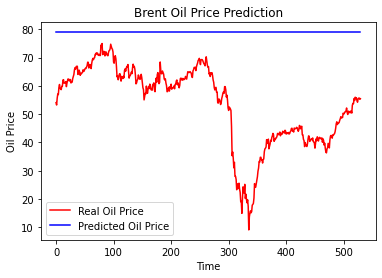

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Oil Price')
plt.plot(svr_rbf_pred, color = 'blue', label = 'Predicted Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [ ]:
# Kernel RBF results
mae = mean_absolute_error(y_test, svr_rbf_pred)
print("RBF MAE:", mae)
mse = mean_squared_error(y_test, svr_rbf_pred)
print("RBF MSE:", mse)
rmse = np.sqrt(mse)
print("RBF RMSE:", rmse)
r2 = r2_score(y_test, svr_rbf_pred)
print("RBF R2:", r2)


RBF MAE: 25.62350091631097
RBF MSE: 855.2478428496985
RBF RMSE: 29.244620750655983
RBF R2: -3.3045622948606956
